In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.impute import SimpleImputer


In [5]:
df1=pd.read_csv("C://Users//chandra.kallimath//Documents//Personal//Simplilearn//case studies//Health Care//Hospitalisation details.csv")

In [7]:
df1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [9]:
df2=pd.read_csv("C://Users//chandra.kallimath//Documents//Personal//Simplilearn//case studies//Health Care//Medical Examinations.csv")

In [11]:
df2.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [13]:
names=pd.read_excel("C://Users//chandra.kallimath//Documents//Personal//Simplilearn//case studies//Health Care//Names.xlsx")

In [15]:
names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


# Data Cleaning 

Before merging the both datasets  clean the columns names 

In [18]:
# Remove the spaces and replace the space bewtween the word with _
df1.columns=df1.columns.str.strip().str.lower().str.replace(" ","_")


In [20]:
df1.columns

Index(['customer_id', 'year', 'month', 'date', 'children', 'charges',
       'hospital_tier', 'city_tier', 'state_id'],
      dtype='object')

In [22]:
df2.columns=df2.columns.str.strip().str.lower().str.replace(" ","_")


In [24]:
df2.columns

Index(['customer_id', 'bmi', 'hba1c', 'heart_issues', 'any_transplants',
       'cancer_history', 'numberofmajorsurgeries', 'smoker'],
      dtype='object')

In [26]:
names.columns=names.columns.str.strip().str.lower().str.replace(" ","_")
names.columns

Index(['customer_id', 'name'], dtype='object')

# Merge all the data sets

In [28]:
## merge the both the data sets
df=df1.merge(df2,on="customer_id",how="left")

In [30]:
df=df.merge(names,on="customer_id",how="left")

In [32]:
df.isnull().sum()

customer_id               0
year                      0
month                     0
date                      0
children                  0
charges                   0
hospital_tier             0
city_tier                 0
state_id                  0
bmi                       8
hba1c                     8
heart_issues              8
any_transplants           8
cancer_history            8
numberofmajorsurgeries    8
smoker                    8
name                      8
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2343 non-null   object 
 1   year                    2343 non-null   object 
 2   month                   2343 non-null   object 
 3   date                    2343 non-null   int64  
 4   children                2343 non-null   int64  
 5   charges                 2343 non-null   float64
 6   hospital_tier           2343 non-null   object 
 7   city_tier               2343 non-null   object 
 8   state_id                2343 non-null   object 
 9   bmi                     2335 non-null   float64
 10  hba1c                   2335 non-null   float64
 11  heart_issues            2335 non-null   object 
 12  any_transplants         2335 non-null   object 
 13  cancer_history          2335 non-null   object 
 14  numberofmajorsurgeries  2335 non-null   

In [36]:
## remove the na values as number of rows are less
df=df.dropna()
df.isnull().sum()

customer_id               0
year                      0
month                     0
date                      0
children                  0
charges                   0
hospital_tier             0
city_tier                 0
state_id                  0
bmi                       0
hba1c                     0
heart_issues              0
any_transplants           0
cancer_history            0
numberofmajorsurgeries    0
smoker                    0
name                      0
dtype: int64

In [38]:
# Remove the rows where value is '?'
df=df.replace('?',np.nan).dropna()


In [40]:
df['year'].value_counts()

year
2004    97
2003    85
1972    60
1988    60
1974    57
1970    56
1975    56
1971    55
1992    55
1976    55
1997    55
1969    54
1994    54
2002    54
1993    53
1981    53
1995    52
1965    51
1978    51
1979    51
1962    50
1982    50
1985    50
1999    50
2001    49
1991    49
1968    49
1966    48
1990    48
1963    48
1998    47
1980    47
1984    46
1973    45
1989    45
2000    45
1964    45
1983    45
1967    44
1996    43
1986    43
1977    43
1987    41
1961    23
1960    23
1959    23
1958    22
Name: count, dtype: int64

In [42]:
# convert to integer
df['year']=df['year'].astype(int)

In [44]:
df['numberofmajorsurgeries'].value_counts()

numberofmajorsurgeries
No major surgery    1070
1                    961
2                    272
3                     22
Name: count, dtype: int64

In [46]:
df['numberofmajorsurgeries']=df['numberofmajorsurgeries'].replace('No major surgery',0).astype(int)

In [48]:
df['numberofmajorsurgeries'].value_counts()

numberofmajorsurgeries
0    1070
1     961
2     272
3      22
Name: count, dtype: int64

In [50]:
# create new column age
df['age']=2025-df['year']

In [ ]:
df['numberofmajorsurgeries'] = df['numberofmajorsurgeries'].replace({'No major surgery': 0}).astype(int)
df['age'] = 2025 - df['year']

In [52]:
df['hospital_tier'].value_counts()  

hospital_tier
tier - 2    1334
tier - 3     691
tier - 1     300
Name: count, dtype: int64

In [54]:
df['hospital_tier']=df['hospital_tier'].str.replace(" ","").str.lower()
df['city_tier']=df['city_tier'].str.replace(" ","").str.lower()

In [56]:
## extrect the gender from name

def exract_gen(name):
    if pd.isna(name):
        return "Unknown"
    name=name.lower()
    if 'mr.' in name or 'mr ' in name:
        return 'Male'
    elif 'ms.' in name or 'ms ' in name:
        return 'Female'
    return 'Unknown'

In [58]:
df['gender']=df['name'].apply(exract_gen)

In [60]:
df['gender'].value_counts()

gender
Male       1160
Female     1023
Unknown     142
Name: count, dtype: int64

In [62]:
df.head()

,customer_id,year,month,date,children,charges,hospital_tier,city_tier,state_id,bmi,hba1c,heart_issues,any_transplants,cancer_history,numberofmajorsurgeries,smoker,name,age,gender
0,Id2335,1992,Jul,9,0,563.84,tier-2,tier-3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",33,Male
1,Id2334,1992,Nov,30,0,570.62,tier-2,tier-1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",33,Male
2,Id2333,1993,Jun,30,0,600.00,tier-2,tier-1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",32,Female
3,Id2332,1992,Sep,13,0,604.54,tier-3,tier-3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",33,Male
4,Id2331,1998,Jul,27,0,637.26,tier-3,tier-3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",27,Male


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt


In [142]:
sns.set(style="whitegrid")

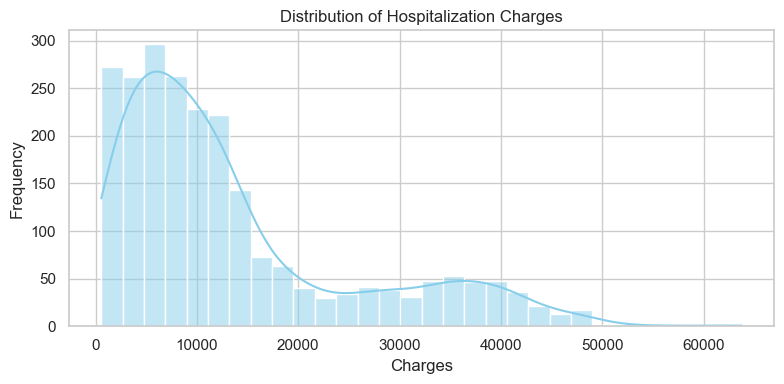

In [146]:
plt.figure(figsize=(8,4))
sns.histplot(df['charges'],bins=30,kde=True,color='skyblue')
plt.title('Distribution of Hospitalization Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.tight_layout()

* can be seen that it is not normally distributed

C:\Users\chandra.kallimath\AppData\Local\Temp\ipykernel_21968\2382919841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='hospital_tier', y='charges', palette="Set2")


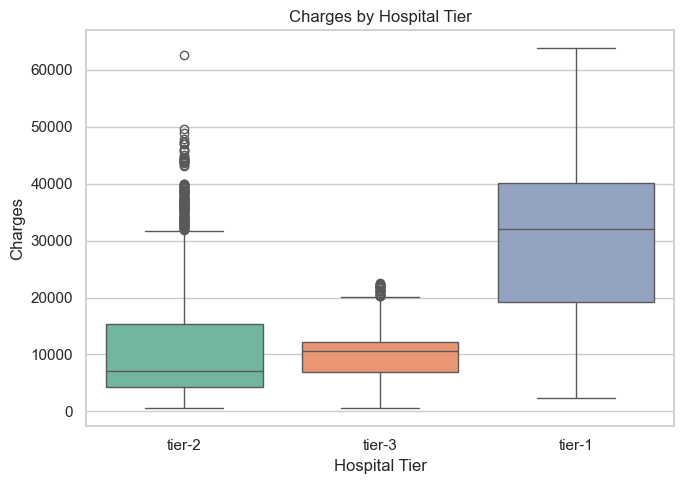

In [149]:
# 2. Boxplot of Charges by Hospital Tier
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='hospital_tier', y='charges', palette="Set2")
plt.title('Charges by Hospital Tier')
plt.xlabel('Hospital Tier')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()
           

* from the box plot can be seen that significant difference in the charges in different tiers

C:\Users\chandra.kallimath\AppData\Local\Temp\ipykernel_21968\4233330053.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='smoker', y='charges', estimator=np.mean, ci=None, palette="pastel")
C:\Users\chandra.kallimath\AppData\Local\Temp\ipykernel_21968\4233330053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='smoker', y='charges', estimator=np.mean, ci=None, palette="pastel")


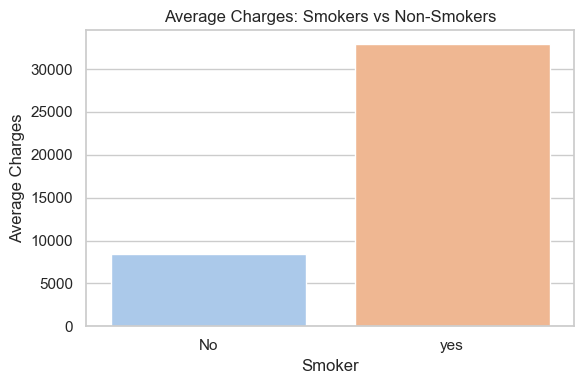

In [154]:
 # 3. Barplot: Average Charges by Smoker Status
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='smoker', y='charges', estimator=np.mean, ci=None, palette="pastel")
plt.title('Average Charges: Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()

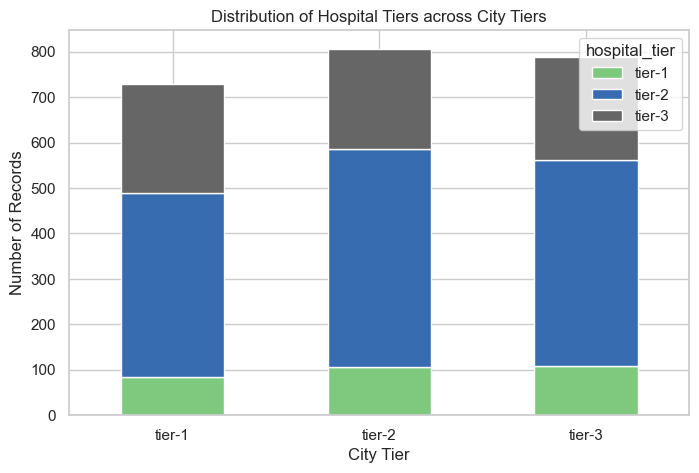

In [156]:
# 4. Stacked Bar Chart: City vs Hospital Tier
city_hosp_ct = pd.crosstab(df['city_tier'], df['hospital_tier'])
city_hosp_ct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Accent')
plt.title('Distribution of Hospital Tiers across City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

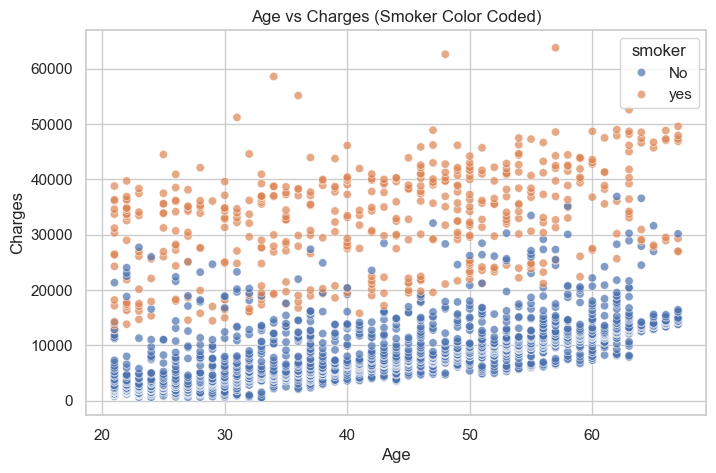

In [158]:
 # 5. Scatter Plot: Age vs Charges (color-coded by Smoker)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Age vs Charges (Smoker Color Coded)')
plt.xlabel('Age')
plt.ylabel('Charges')
 plt.show()

# Hypothesis Testing

In [65]:
df['hospital_tier'].value_counts()

hospital_tier
tier-2    1334
tier-3     691
tier-1     300
Name: count, dtype: int64

In [67]:
df['city_tier'].value_counts()

city_tier
tier-2    807
tier-3    789
tier-1    729
Name: count, dtype: int64

In [69]:
## extract the coloum charges where tier is 1
tier1=df[df['hospital_tier']=='tier-1']['charges']


In [71]:
tier2=df[df['hospital_tier']=='tier-2']['charges']
tier3=df[df['hospital_tier']=='tier-3']['charges']


In [73]:
city1=df[df['city_tier']=='tier-1']['charges']
city2=df[df['city_tier']=='tier-1']['charges']
city3=df[df['city_tier']=='tier-1']['charges']

# F-test to compare the charges between different tiers 

In [76]:
from scipy.stats import f_oneway

In [78]:
fstat_a,pval_a=f_oneway(tier1, tier2, tier3)

In [80]:
fstat_a,pval_a

(493.98956631117636, 1.7738221310852664e-179)

* test indicates that there is significant diffrence in the charges between the different tiers. reject the null hypothesis 

In [83]:
fstat_b,pval_b=f_oneway(city1,city2,city3)
fstat_b,pval_b

(2.0447073659525246e-30, 1.0)

* in the city tier there is no change in the charges between the different tiers

In [86]:
df['smoker'].value_counts()

smoker
No     1839
yes     486
Name: count, dtype: int64

In [96]:
## check is there any difference in the  insurance charges paid by smoker and non-smoker
smoker_yes=df[df['smoker']=='yes']['charges']
smoker_no=df[df['smoker']=='No']['charges']


In [102]:
## compare charges between smoker and non smoker
pval_result=ttest_ind(smoker_yes,smoker_no,equal_var=False).pvalue
pval_result

6.697431845033993e-238

* charges taken from smoker and nonsmoker is varies

# Chi-Square Test

* Let us check the two categorical variables smoker and heart disease has any relation
* Null Hypothesis:Smoking and heart issues are independent
* Alternative Hpothesis:Smoking and heart issues are dependent

In [109]:
chi2,pval_d,_, _=chi2_contingency(pd.crosstab(df['smoker'],df['heart_issues']))

In [111]:
chi2,pval_d,_, _

(0.08588150449910657,
 0.7694797581780767,
 array([[1111.30967742,  727.69032258],
        [ 293.69032258,  192.30967742]]),
 array([[1111.30967742,  727.69032258],
        [ 293.69032258,  192.30967742]]))

In [113]:
chi2

0.08588150449910657

In [115]:
pval_d

0.7694797581780767

* Pvalues is greater than 0.05, there is no statistically significant association between smoking and heart issues

In [118]:
features = ['age', 'bmi', 'hba1c', 'numberofmajorsurgeries', 'gender', 'hospital_tier', 'city_tier', 'smoker']
X = df[features]
y = df['charges']

In [120]:
# Column transformers
numeric_cols = ['age', 'bmi', 'hba1c', 'numberofmajorsurgeries']
categorical_cols = ['gender', 'hospital_tier', 'city_tier', 'smoker']


In [124]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])


In [126]:
## Applying Ridge Regression
ridge_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',Ridge(alpha=1.0))
])

In [128]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')

# Gradient Boost
gb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
gb_model.fit(X, y)
feature_importance = gb_model.named_steps['regressor'].feature_importances_


In [130]:
#Scenario-Based Prediction (Ms. Jayna)

scenario = pd.DataFrame([{
    'age': 2025 - 1988,
    'bmi': 85 / ((170/100)**2),
    'hba1c': 5.8,
    'numberofmajorsurgeries': 0,
    'gender': 'Female',
    'hospital_tier': 'tier-1',
    'city_tier': 'tier-1',
    'smoker': 'yes'
}])
predicted_cost = gb_model.predict(scenario)[0]

In [136]:
print(" Ridge CV RMSE Scores:", -ridge_scores)
print(" Top Feature Importances (GB):")
for i, score in enumerate(feature_importance):
    print(f"{i+1}. {score:.3f}")

📈 Ridge CV RMSE Scores: [4824.93568922 4923.88797517 3879.91627119 4184.79789929 4486.89233383]
🌲 Top Feature Importances (GB):
1. 0.096
2. 0.118
3. 0.003
4. 0.000
5. 0.001
6. 0.000
7. 0.002
8. 0.011
9. 0.000
10. 0.000
11. 0.768


In [134]:
    
print(f"\n💡 Predicted cost for Ms. Jayna: ₹{predicted_cost:,.2f}")



💡 Predicted cost for Ms. Jayna: ₹27,085.43
